/Users/Gorkem/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/100
30108/30108 [==============================] - 1s 49us/step - loss: 0.0248 - mae: 0.1017 - accuracy: 1.3286e-04
Epoch 2/100
30108/30108 [==============================] - 1s 43us/step - loss: 0.0231 - mae: 0.0950 - accuracy: 1.3286e-04
Epoch 3/100
30108/30108 [==============================] - 1s 44us/step - loss: 0.0216 - mae: 0.0924 - accuracy: 1.3286e-04
Epoch 4/100
30108/30108 [==============================] - 1s 48us/step - loss: 0.0212 - mae: 0.0919 - accuracy: 1.3286e-04
Epoch 5/100
30108/30108 [==============================] - 2s 56us/step - loss: 0.0209 - mae: 0.0910 - accuracy: 1.3286e-04
Epoch 6/100
30108/30108 [==============================] - 1s 47us/step - loss: 0.0209 - mae: 0.0909 - accuracy: 1.3286e-04
Epoch 7/100
30108/30108 [==============================] - 1s 43us/step - loss: 0.0205 - mae: 0.0901 - accuracy: 1.3286e-04
Epoch 8/100
30108/30108 [==============================] - 1s 43us/step - loss: 0.0205 - mae: 0.0903 - accuracy: 1.3286e-04
Epoch 9/

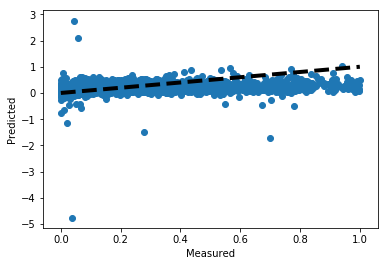

Mean absolute Error Rev: 91263.2457404498


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('company_data.csv')
dataset.head(2)

dataset.describe(include='all')


X = dataset.iloc[:, :-1].values # Independent Variables
y = dataset.iloc[:, -1].values   # Dependent Variables

from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)  

from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=212, input_dim=212,activation='relu'))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam',loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

results=regressor.fit(X_train,y_train)

y_pred= regressor.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

import sklearn.metrics as metrics
y_pred=y_pred.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

inv_y_pred = sc.inverse_transform(y_pred) # Rescaling back
inv_y_test = sc.inverse_transform(y_test)
print('Mean absolute Error Rev:', metrics.mean_absolute_error(inv_y_test, inv_y_pred)) 


In [6]:
import sklearn.metrics as metrics
y_pred=y_pred.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

inv_y_pred = sc.inverse_transform(y_pred) # Rescaling back
inv_y_test = sc.inverse_transform(y_test)
print('Mean absolute Error Rev:', metrics.mean_absolute_error(inv_y_test, inv_y_pred)) 

Mean absolute Error Rev: 90074.4580349865
